
#  The sparks foundation

# Stock Market Prediction using Numerical and Textual Analysis 


# Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

# Author- Kuwar Kapur 

# IMPORTING THE BASIC LIBRARIES



In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

# READING THE DATASET

In [98]:
news=pd.read_csv('news_headlines.csv')
stock=pd.read_csv('NIKE.csv')

# CONVERTING DATASET ACCORDING TO A REGULAR ORDER OF A DATE

In [103]:
stock_news= news.drop_duplicates()
stock_news['publish_date'] = stock_news['publish_date'].astype(str)
stock_news['publish_date']=pd.to_datetime(stock_news['publish_date']).dt.normalize()
stock_news=stock_news.drop('headline_category',axis=1)

In [104]:
stock_headlines = stock_news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
stock_headlines.set_index('publish_date', inplace= True)
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


# NORMALISING PRICE DATASET AND CONCATENATING BOTH OF THEM

In [ ]:
stock_price= stock.drop_duplicates()
stock_price['Date'] = stock_price['Date'].astype(str)
stock_price['Date']=pd.to_datetime(stock_price['Date']).dt.normalize()
stock_price.set_index('Date', inplace= True)
stock_price = stock_price.sort_index(ascending=True, axis=0)

In [ ]:
stock_data=pd.concat([stock_headlines,stock_price],axis=1)

In [ ]:
stock_data.dropna(axis=0,inplace=True)

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5004 entries, 2001-01-02 to 2020-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   headline_text  5004 non-null   object 
 1   Open           5004 non-null   float64
 2   High           5004 non-null   float64
 3   Low            5004 non-null   float64
 4   Close          5004 non-null   float64
 5   Adj Close      5004 non-null   float64
 6   Volume         5004 non-null   float64
dtypes: float64(6), object(1)
memory usage: 312.8+ KB


# IN THIS WE HAVE USED VADER THROUGH WHICH WE HAVE USED SID a.k.a Sentiment Intensity Analyzer.


# Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

# AND IN THIS WE BASICALLY JUST HAVE COLLECTED THE COMPUND THROUGH WHICH YOU CAN TELL THAT THE EMOTIONS ARE POSITIVE OR NEGATIVE .

# for ex:- if the compund value is less than 0.05 the emotions are negative and 
# if the compund value is greater than 0.05 the emotions are positive.

In [ ]:
import nltk
nltk.download('vader_lexicon')
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# displaying the stock data
stock_data.head()

# IMPORTING FLAIR 

# BASICALLY Flair utilizes a pre-trained model to detect positive or negative comments and print a number in brackets behind the label which is a prediction confidence



In [ ]:
import flair
sentiment=flair.models.TextClassifier.load('en-sentiment')

In [ ]:
stock_data['negative'] = ''
stock_data['positive'] = ''

In [ ]:

for i in range(len(stock_data)):
    sentence=flair.data.Sentence(stock_data['headline_text'][i])
    sentiment.predict(sentence)
    if sentence.labels[0].value =='NEGATIVE':
        stock_data['negative'][i]=sentence.labels[0].score
        stock_data['positive'][i]=1-sentence.labels[0].score
    else:
        stock_data['negative'][i]=1-sentence.labels[0].score
        stock_data['positive'][i]=sentence.labels[0].score


In [ ]:
stock_data=stock_data.drop('headline_text',axis=1)

# SAVING THE DATA 

In [ ]:
stock_data.to_csv('stocks1.csv')

# VISULISATION OF OUR DATA

In [ ]:
stock_data['compoundshift']=stock_data['Close'].shift(-1)
stock_data['closeshift']=stock_
+data['Close'].shift(-1)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'compound',
       'negative', 'positive', 'compoundshift', 'closeshift'],
      dtype='object')
Open


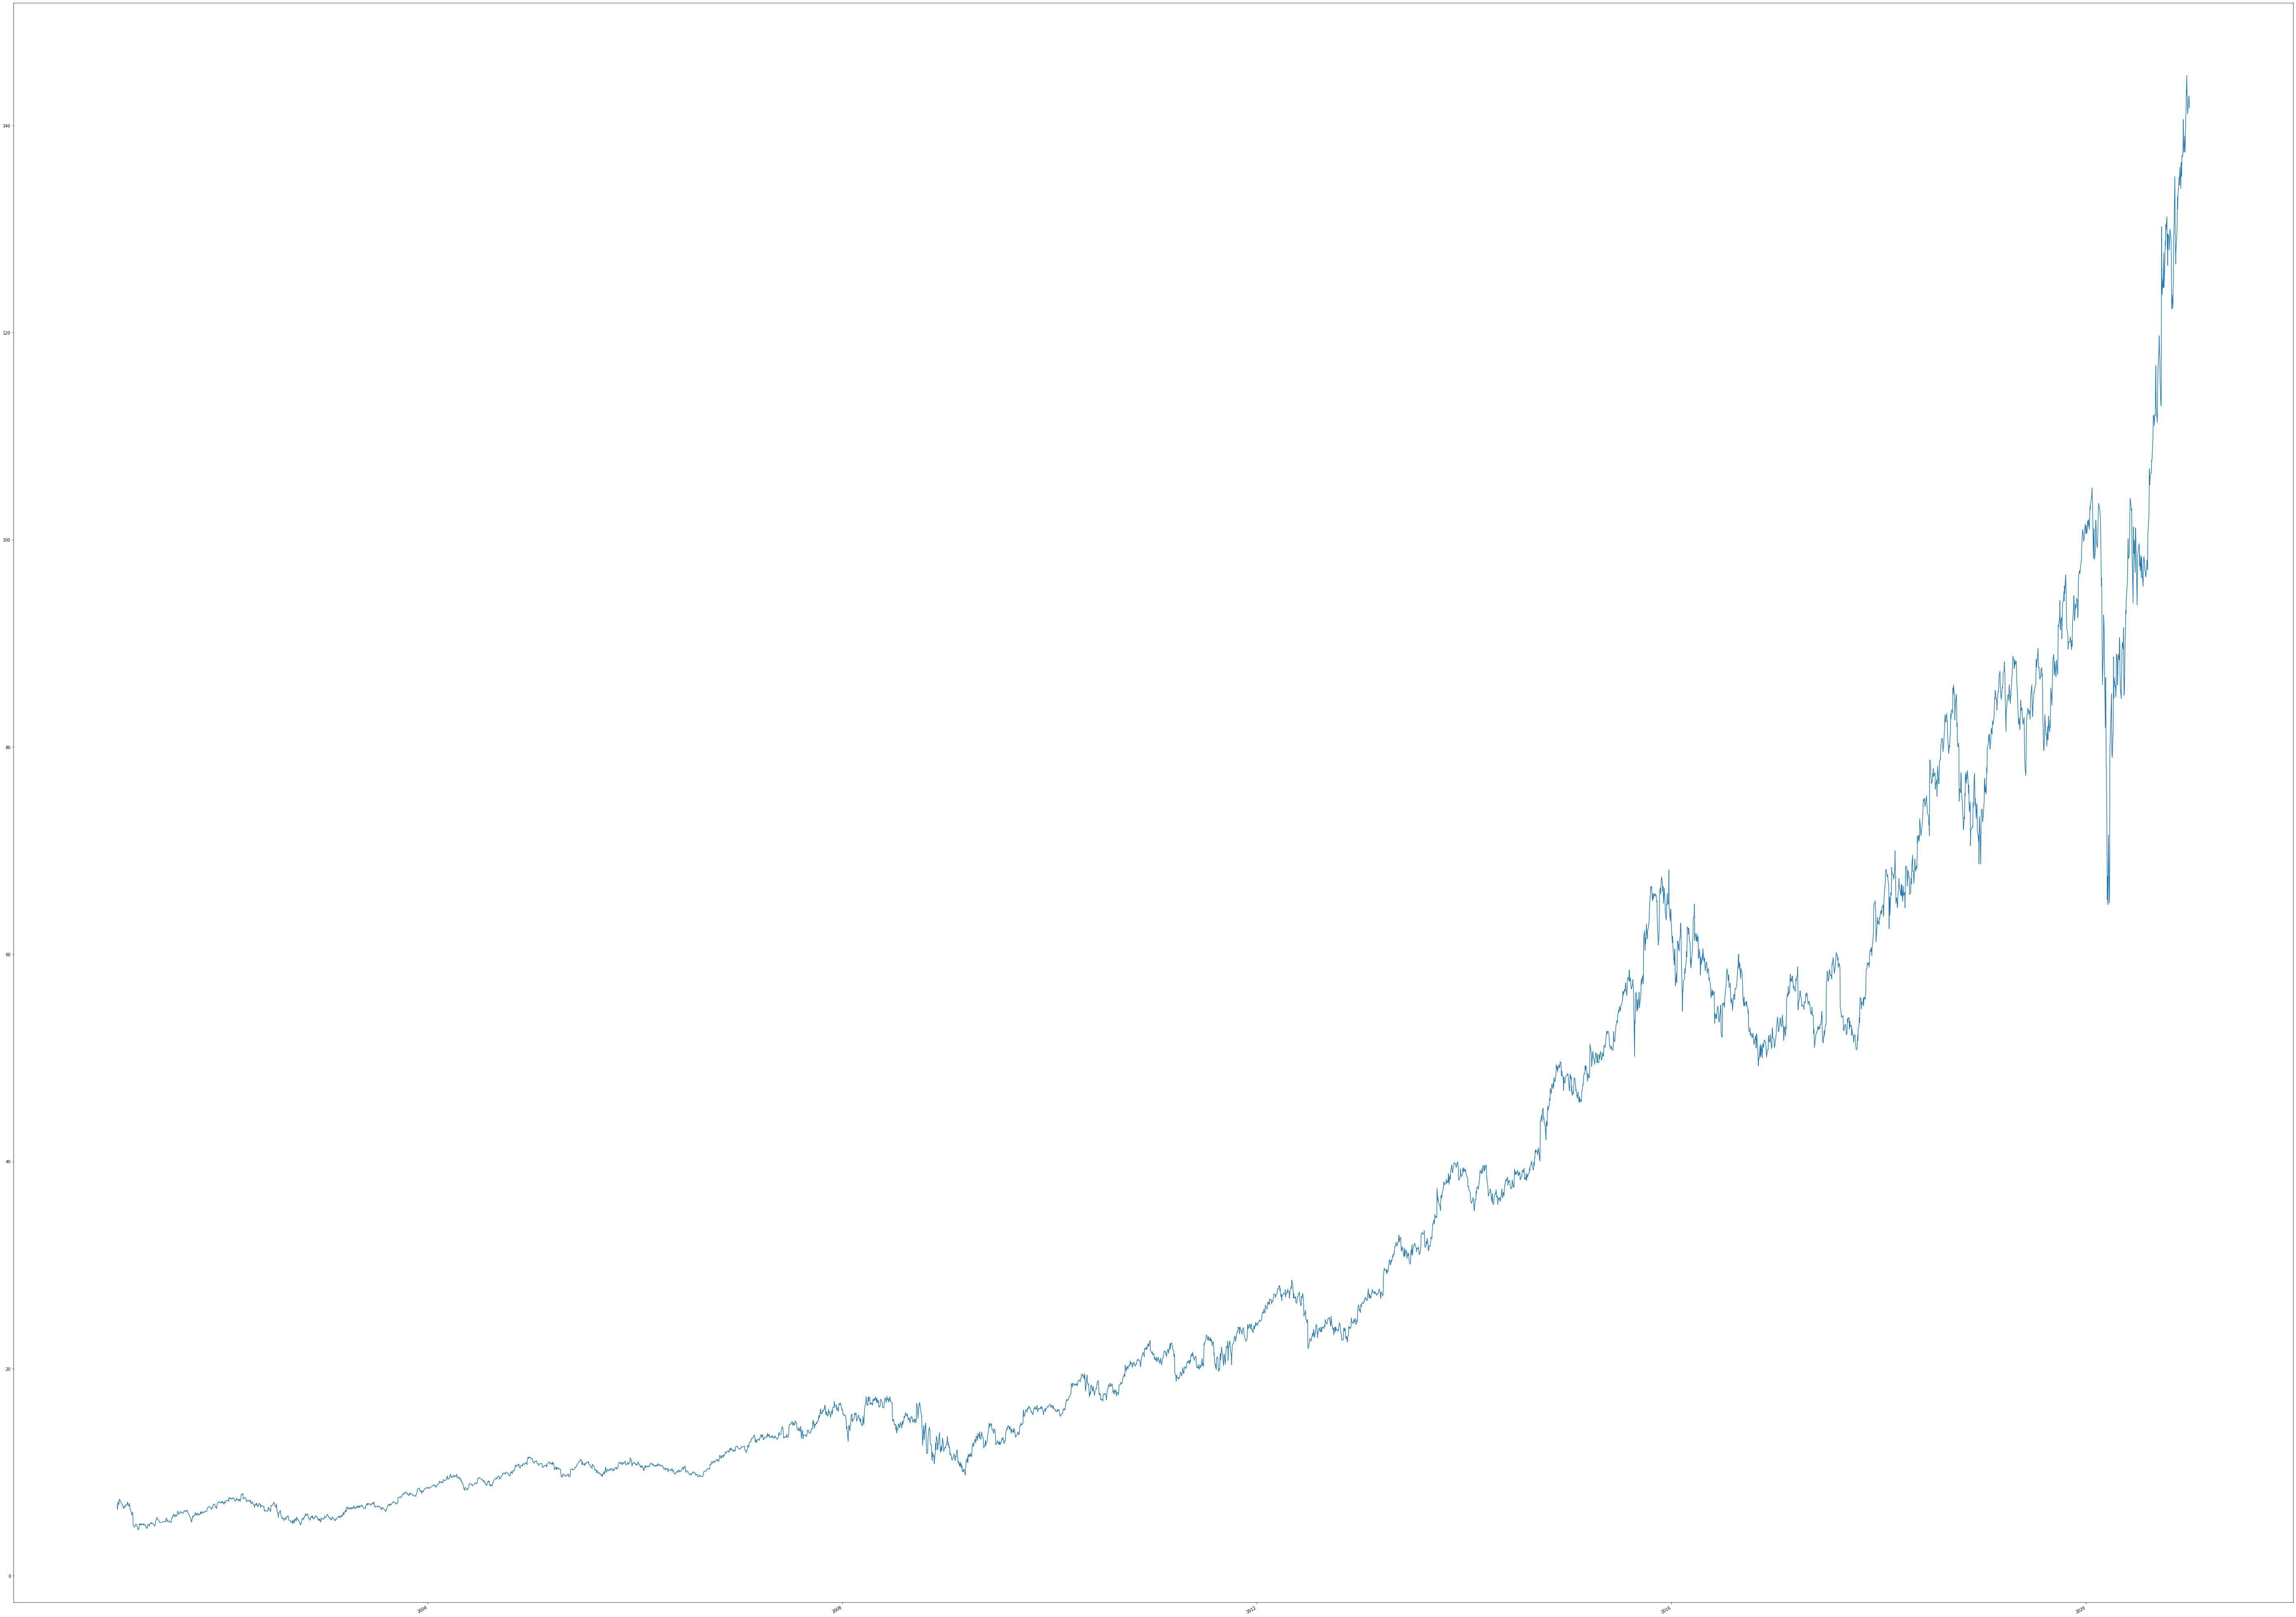

High


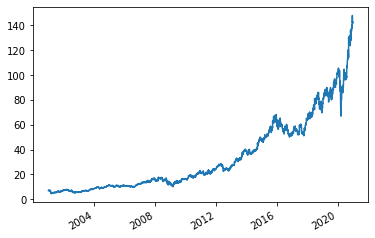

Low


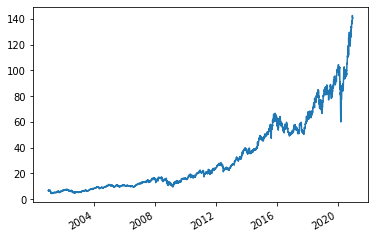

Close


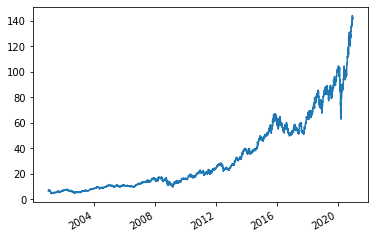

Adj Close


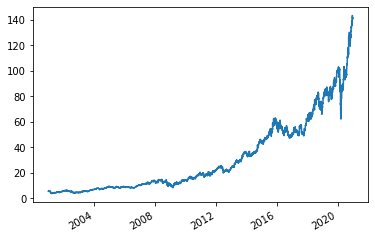

Volume


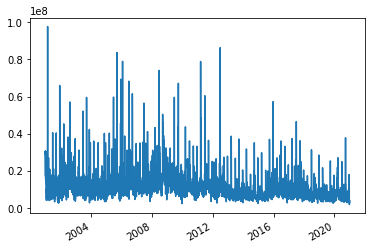

compound


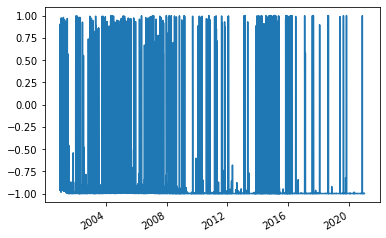

negative


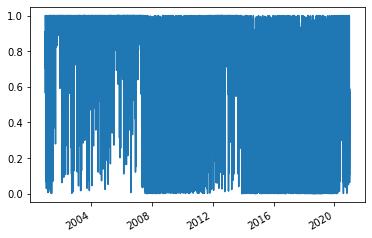

positive


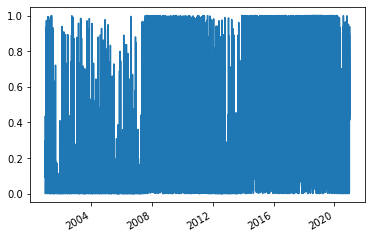

compoundshift


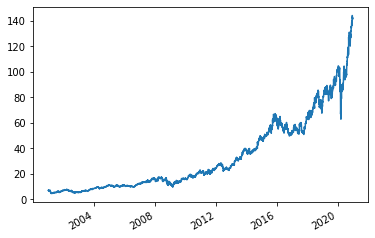

closeshift


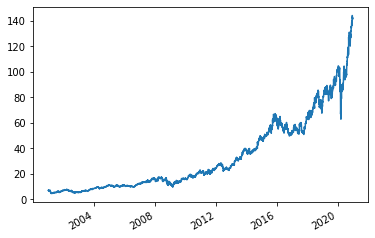

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
print(stock_data.columns)
for i in stock_data.columns:
  print(i)
  stock_data[i].plot()
  plt.show()



# USING THE DATASET SAVED

In [2]:

# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('stocks1.csv', index_col = False)
stock_data.describe()
# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
compound         0
negative         0
positive         0
compoundshift    1
closeshift       1
dtype: int64

In [3]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,compound,negative,positive,compoundshift,closeshift
count,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5.004000e+03,5004.000000,5004.000000,5004.000000,5003.000000,5003.000000
mean,33.386426,33.713686,33.064227,33.396676,31.269876,1.087256e+07,-0.872099,0.655797,0.344203,33.401999,33.401999
std,29.313799,29.584065,29.030299,29.306642,29.272698,6.843626e+06,0.450868,0.407245,0.407245,29.307152,29.307152
min,4.453750,4.525000,4.415000,4.523750,3.624696,1.821900e+06,-1.000000,0.000010,0.000018,4.523750,4.523750
25%,10.660937,10.766875,10.585938,10.670625,8.769066,6.805100e+06,-0.999800,0.170880,0.004367,10.673125,10.673125
50%,20.513750,20.736250,20.373750,20.542501,18.157089,9.247200e+06,-0.999100,0.925688,0.074312,20.547501,20.547501
75%,53.205001,53.639999,52.882501,53.240002,50.777001,1.291470e+07,-0.994400,0.995633,0.829120,53.240002,53.240002
max,144.820007,147.949997,142.509995,144.020004,143.438354,9.776080e+07,1.000000,0.999982,0.999990,144.020004,144.020004


In [4]:
stock_data=stock_data.dropna()

# SPLITTING THE DATA INTO TRAIN AND TEST

In [8]:
X_train=stock_data[:4000].drop('Close',axis=1)
X_test=stock_data[4000:].drop('Close',axis=1)
y_train=stock_data['Close'][:4000]
y_test=stock_data['Close'][4000:]

# RESHAPING OUR DATA FOR THE MODEL

In [9]:
cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'compound',
       'negative', 'positive', 'compoundshift']
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
x_train = np.array(X_train).reshape(len(X_train) ,len(cols))
x_train = scaler_train.fit_transform(x_train)
x_test = np.array(X_test).reshape(len(X_test) ,len(cols))
x_test = scaler_train.fit_transform(x_test)

# scaling the target variable
scaler_test = MinMaxScaler()
y_train = np.array(y_train).reshape(len(y_train) ,1)
y_train = scaler_test.fit_transform(y_train)
y_test = np.array(y_test).reshape(len(y_test) ,1)
y_test = scaler_test.fit_transform(y_test)

In [10]:
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (4000, 10)
Shape of Test set X: (1003, 10)


# RandomForestRegressor 

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=3)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)
print(round(forest_model.score(x_train, y_train)*100,2))
y_pred=y_pred.reshape(-1,1)

100.0


# LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
print(prediction)

[[0.78836314]
 [0.78163816]
 [0.77961971]
 ...
 [2.20471292]
 [2.19686772]
 [2.19868835]]


In [13]:
reg = LinearRegression().fit(X_train,y_train)
cm1=reg.score(X_train,y_train)
print(cm1)

0.9999396190993664


# INVERSE TRANSFORMATION 

In [14]:

predy=scaler_test.inverse_transform(y_pred)
print(predy)
predi=scaler_test.inverse_transform(y_test)
print(predi)
print(predi.sum())

[[ 53.65945371]
 [ 53.08108175]
 [ 52.73949232]
 ...
 [142.18554826]
 [141.57187989]
 [141.59590436]]
[[ 53.91    ]
 [ 53.380001]
 [ 53.110001]
 ...
 [142.429993]
 [141.570007]
 [141.580002]]
80780.340074


# CHECKING THE RESULTS THROUGH PLOTTING 

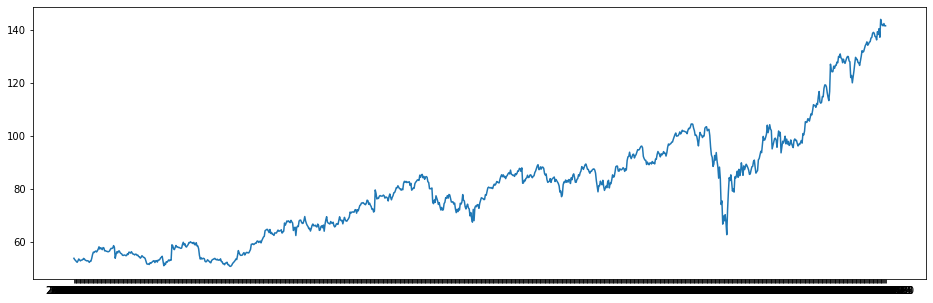

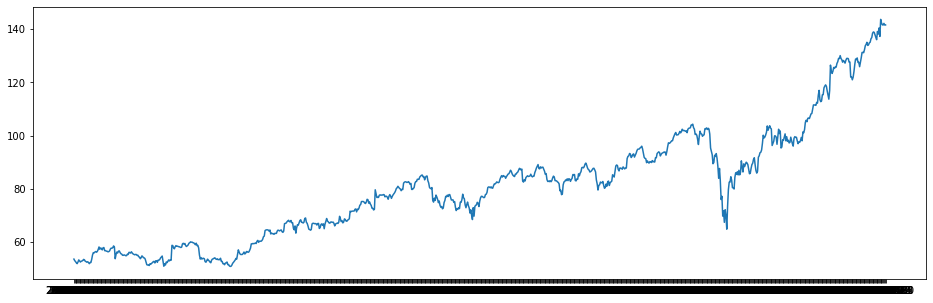

In [15]:
# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
#plt.plot([row[0] for row in y_train], label="Training Close Price")
#plt.show()
plt.plot(X_test.index, predi, label="Predicted Close Price")
plt.show()
plt.figure(figsize=(16,5))
plt.plot(X_test.index, predy,label="Testing Close Price")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

In [17]:
stock_data['first_diff']=stock_data['Close']-stock_data['Close'].shift(12)

# using the adafuller test for determining if our data is stationery or not

In [18]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(stock_data['Close'])
test_result

(3.132464540833907,
 1.0,
 31,
 4971,
 {'1%': -3.431666169784722,
  '5%': -2.862121603975143,
  '10%': -2.567079588629541},
 11367.87598021129)

In [19]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(stock_data['Close'])

ADF Test Statistic : 3.132464540833907
p-value : 1.0
#Lags Used : 31
Number of Observations Used : 4971
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


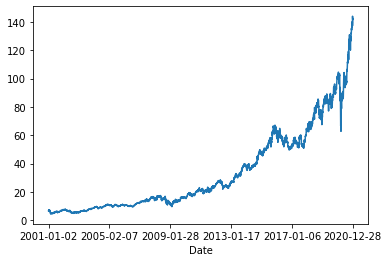

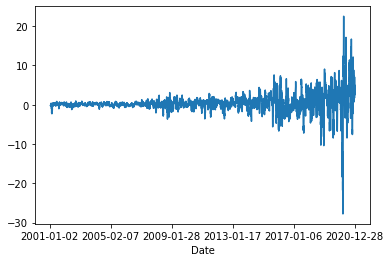

In [21]:
stock_data['Close'].plot()
plt.show()
stock_data['first_diff'].plot()
plt.show()


In [22]:
adfuller_test(stock_data['first_diff'].dropna())

ADF Test Statistic : -10.992045383241553
p-value : 7.019853395000554e-20
#Lags Used : 32
Number of Observations Used : 4958
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# finding the value of p,q,d for putting that into our arima model

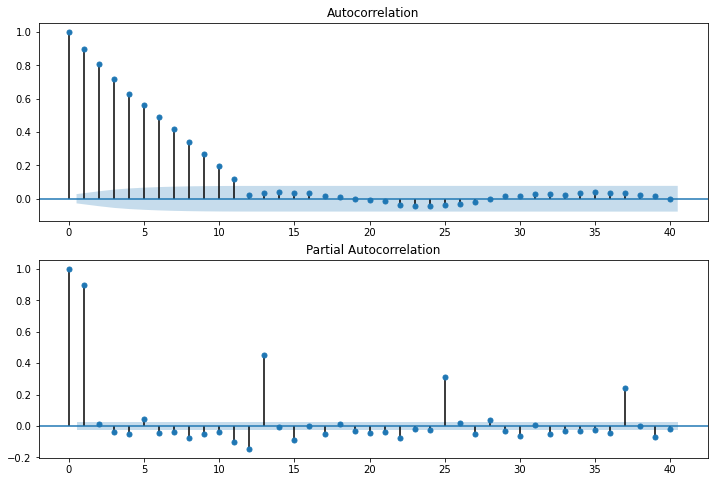

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(stock_data['first_diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(stock_data['first_diff'].dropna(),lags=40,ax=ax2)

# ARIMA

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
mod=ARIMA(stock_data['Close'],order=(1,2,11))
model_fit=mod.fit()

C:\Users\Kuwar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Kuwar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 5001
Model:                ARIMA(1, 2, 11)   Log Likelihood               -5723.522
Method:                       css-mle   S.D. of innovations              0.759
Date:                Sun, 08 Aug 2021   AIC                          11475.045
Time:                        17:58:09   BIC                          11566.288
Sample:                             2   HQIC                         11507.024
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.183e-05   2.12e-05      1.028      0.304   -1.98e-05    6.35e-05
ar.L1.D2.Close     -0.8416      0.113     -7.481      0.000      -1.062      -0.621
ma.L1.D2.Close     -0.2139      0.114     -1.877      0.061      -0.437       0.009
ma.L2.D2.Close     -0.8013      0.119     -6.735      0.000      -1.035      -0.568
ma.L3.D2.Close      0.0148      0.020      0.734      0.463      -0.025       0.054
ma.L4.D2.Close     -0.1126      0.019     -5.915      0.000      -0.150      -0.075
ma.L5.D2.Close      0.0578      0.020      2.872      0.004       0.018       0.097
ma.L6.D2.Close      0.0514      0.024      2.180      0.029       0.005       0.098
ma.L7.D2.Close      0.0448      0.018      2.425      0.015       0.009       0.081
ma.L8.D2.Close     -0.0356      0.019     -1.869      0.062      -0.073       0.002
ma.L9.D2.Close     -0.0624      0.022     -2.818      0.005      -0.106      -0.019
ma.L10.D2.Close     0.0579      0.015      3.748      0.000       0.028       0.088
ma.L11.D2.Close     0.0006      0.018      0.035      0.972      -0.035       0.036
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1882           +0.0000j            1.1882            0.5000
MA.1            -1.1805           -0.1423j            1.1890           -0.4809
MA.2            -1.1805           +0.1423j            1.1890            0.4809
MA.3            -0.8394           -1.0784j            1.3666           -0.3553
MA.4            -0.8394           +1.0784j            1.3666            0.3553
MA.5             0.1090           -1.3406j            1.3450           -0.2371
MA.6             0.1090           +1.3406j            1.3450            0.2371
MA.7             1.0009           -0.0000j            1.0009           -0.0000
MA.8             1.4603           -0.0000j            1.4603           -0.0000
MA.9             1.2100           -0.9913j            1.5642           -0.1092
MA.10            1.2100           +0.9913j            1.5642            0.1092
MA.11          -92.9335           -0.0000j           92.9335           -0.5000
------------------------------------------------------------------------------
"""

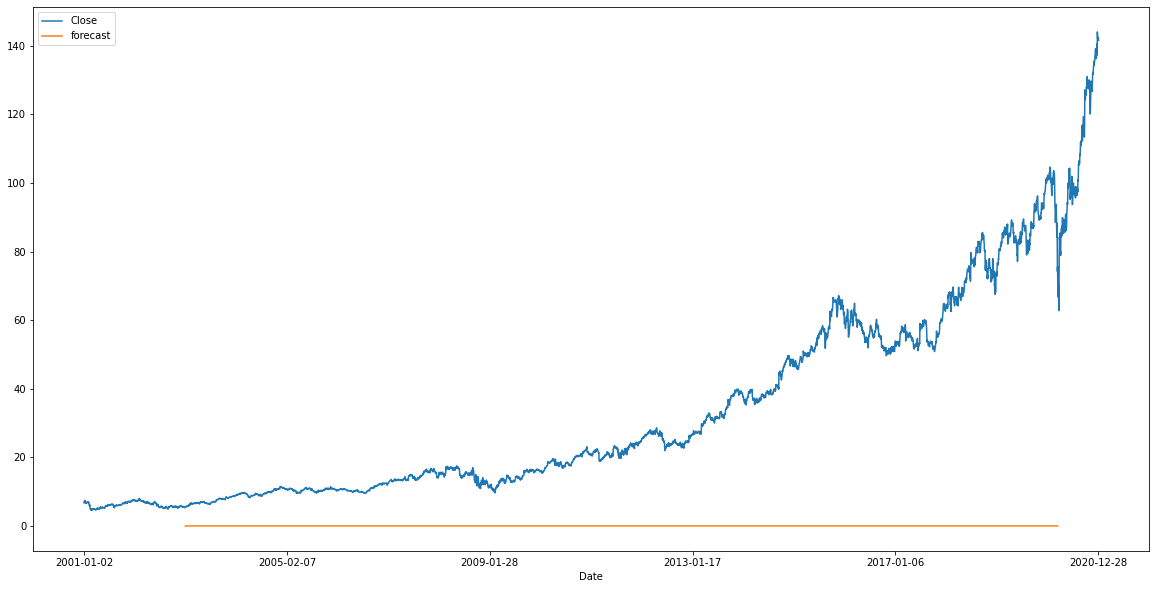

In [30]:
stock_data['forecast']=model_fit.predict(start=500,end=4800,dynamic=True)
stock_data[['Close','forecast']].plot(figsize=(20,10))

# SARIMAX

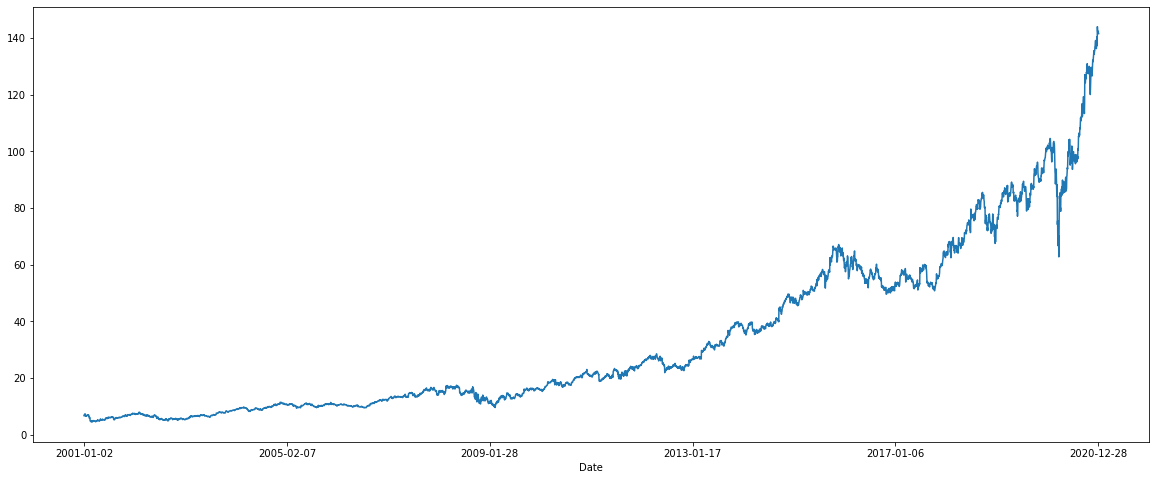

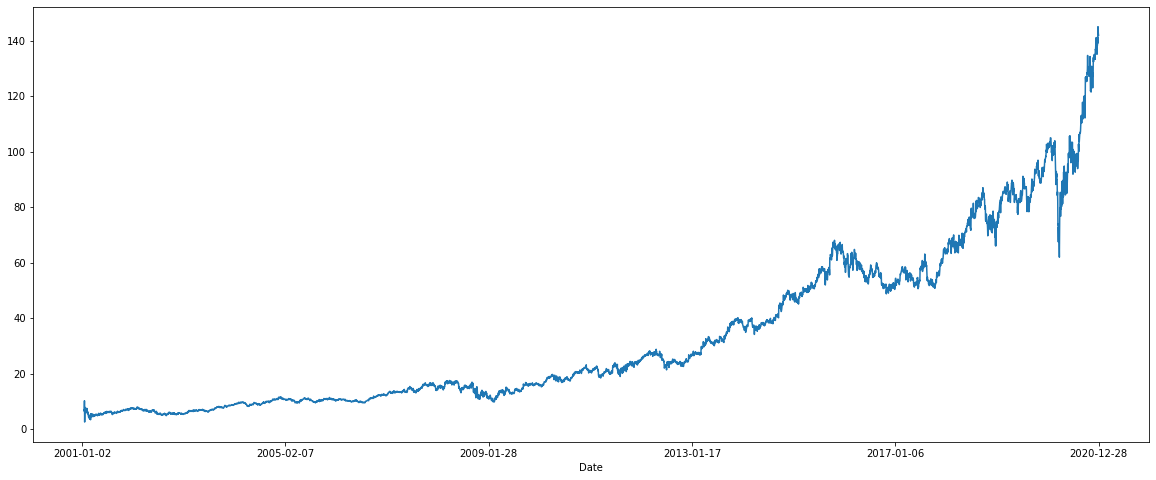

In [9]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(stock_data['Close'],order=(1, 2, 1),seasonal_order=(1,2,1,12))
results=model.fit()
stock_data['forecast']=results.predict(start=10,end=5000,dynamic=False)
stock_data['Close'].plot(figsize=(20,8), label="Close Price")
plt.show()
stock_data['forecast'].plot(figsize=(20,8), label="Predicted Close Price")
plt.show()